A summary of tests done so far for Salish Sea Lake

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import gsw_calls
import xarray as xr
import numpy.ma as ma
import netCDF4 as nc
from salishsea_tools import (nc_tools, viz_tools)

In [105]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   

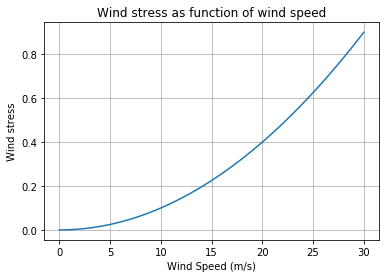

In [96]:
Q0 = 10**3
C =  10**(-3)
Qa = 1

windspeed = np.linspace(0,30,100)
windstress = windspeed**2 * Qa * C / Q0 * Q0 

plt.plot(windspeed,windstress)
plt.grid('on')
plt.title('Wind stress as function of wind speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind stress')

# January with rr_vtau = 0.1, -0.1

In [11]:
WN010T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_T.nc')
WN010V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_V.nc')
WS010T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_T.nc')
WS010V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_V.nc')

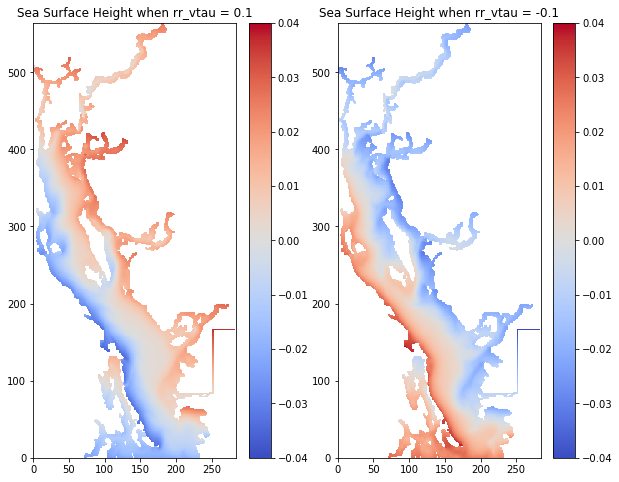

In [97]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN010T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.04, vmax = 0.04, cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.1')

ssh2 = ma.masked_array(WS010T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.04, vmax = 0.04, cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.1')

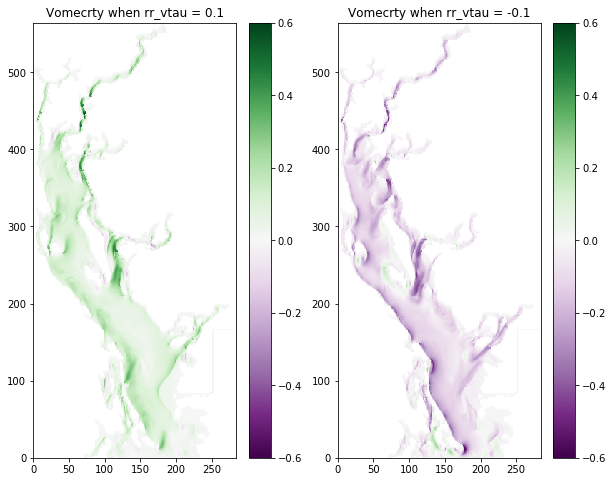

In [53]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN010V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.6, vmax = 0.6, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.1')

ssh2 = ma.masked_array(WS010V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.6, vmax = 0.6, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.1')

In [161]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN010T.variables['deptht'][:], 1) * ones,
                                        ones * WN010T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN010T.variables['deptht'][:], 1) * ones,
                                        ones * WN010T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN010T.variables['vosaline'][47,:,350,:],
                                        WN010T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS010T.variables['vosaline'][47,:,350,:],
                                        WS010T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN010T.variables['vosaline'][47,:,180,:],
                                        WN010T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS010T.variables['vosaline'][47,:,180,:],
                                        WS010T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

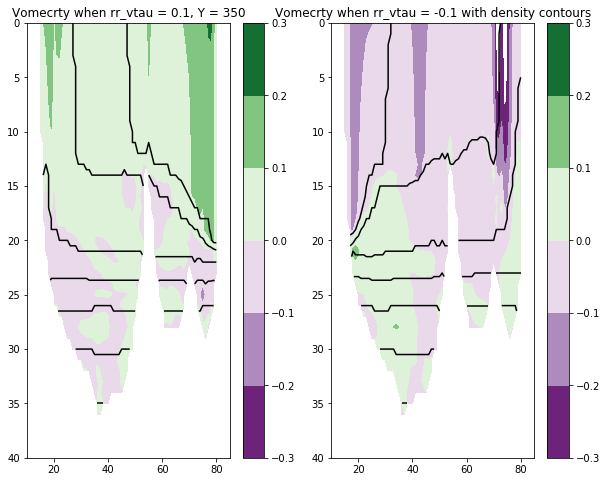

In [156]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN010V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.3,0.4,0.1), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.1, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(WS010V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.3,0.4,0.1), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.1 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

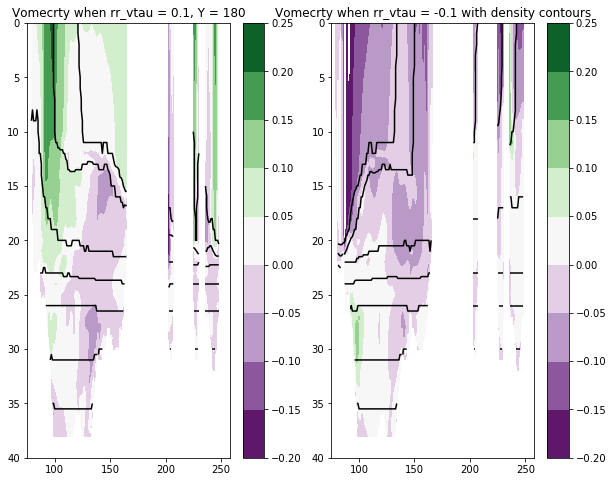

In [164]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN010V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.2,0.3,0.05), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.1, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(WS010V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.2,0.3,0.05), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.1 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# June with rr_vtau = 0.1, -0.1

In [37]:
SN010T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_T.nc')
SN010V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS010T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_T.nc')
SS010V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

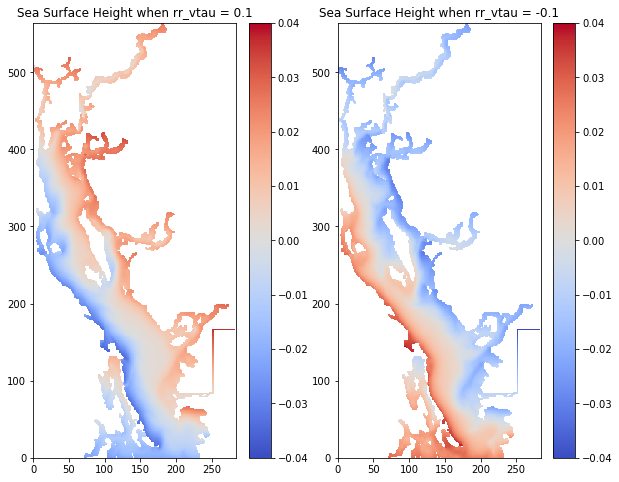

In [98]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN010T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.04, vmax = 0.04, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.1')

ssh2 = ma.masked_array(SS010T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.04, vmax = 0.04, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.1')

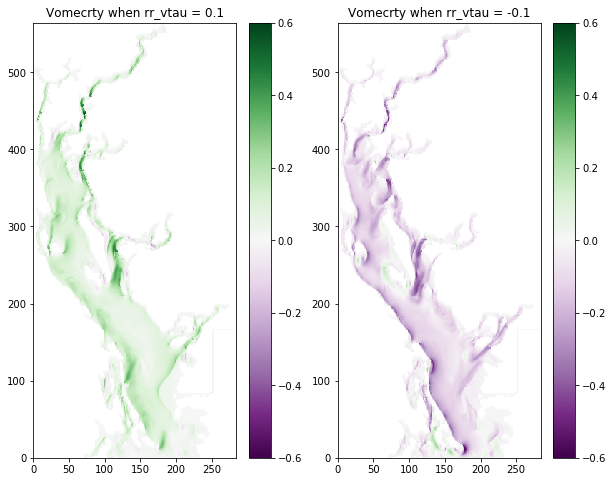

In [61]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN010V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1,vmin = -0.6, vmax = 0.6, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.1')

ssh2 = ma.masked_array(SS010V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.6, vmax = 0.6, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.1')

In [171]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN010T.variables['deptht'][:], 1) * ones,
                                        ones * SN010T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN010T.variables['deptht'][:], 1) * ones,
                                        ones * SN010T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN010T.variables['vosaline'][47,:,350,:],
                                        SN010T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS010T.variables['vosaline'][47,:,350,:],
                                        SS010T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN010T.variables['vosaline'][47,:,180,:],
                                        SN010T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS010T.variables['vosaline'][47,:,180,:],
                                        SS010T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

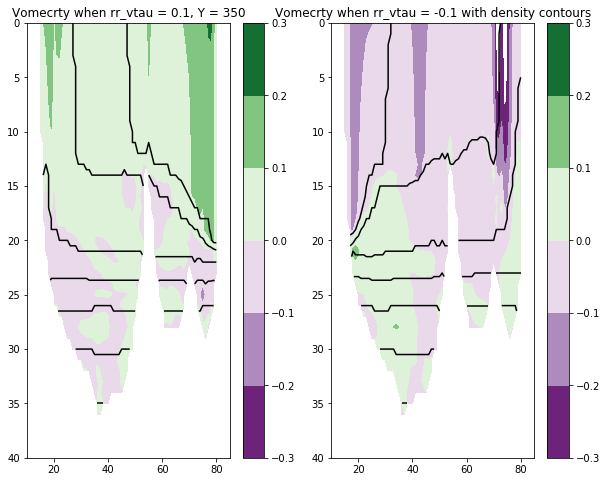

In [172]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN010V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.3,0.4,0.1), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.1, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(SS010V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.3,0.4,0.1), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.1 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

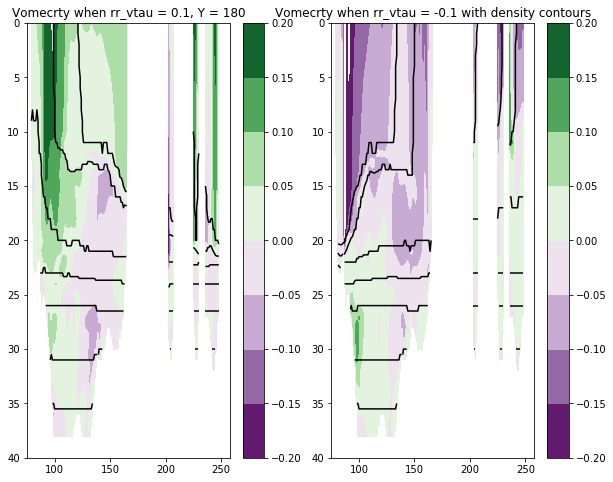

In [173]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN010V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.2,0.25,0.05), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.1, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(SS010V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.2,0.25,0.05), #vmin = -0.36, vmax = 0.25, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.1 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# Jan with rr_vtau = 0.05, -0.05

In [57]:
WN005T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.05/SalishSea_1h_20170101_20170102_grid_T.nc')
WN005V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.05/SalishSea_1h_20170101_20170102_grid_V.nc')
WS005T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.05/SalishSea_1h_20170101_20170102_grid_T.nc')
WS005V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.05/SalishSea_1h_20170101_20170102_grid_V.nc')

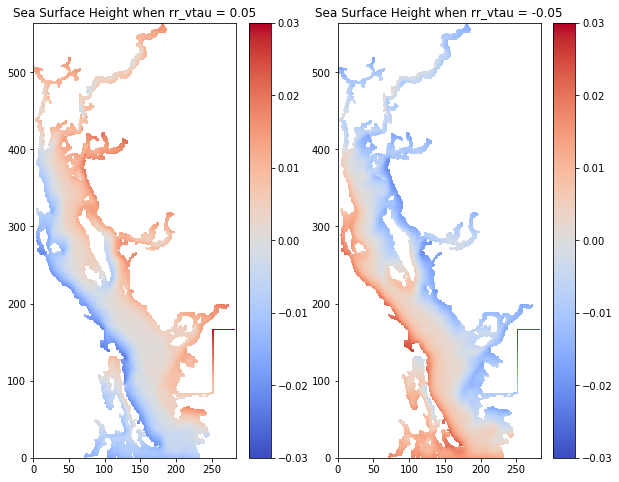

In [99]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN005T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.03, vmax = 0.03, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.05')

ssh2 = ma.masked_array(WS005T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.03, vmax = 0.03, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.05')

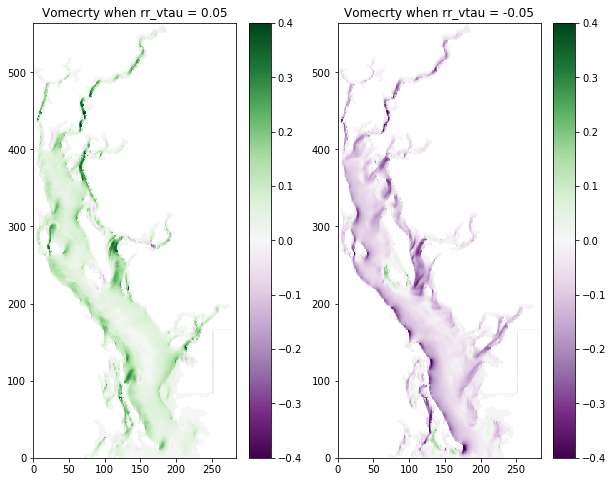

In [63]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN005V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.4, vmax = 0.4, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.05')

ssh2 = ma.masked_array(WS005V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.4, vmax = 0.4, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.05')

In [174]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN005T.variables['deptht'][:], 1) * ones,
                                        ones * WN005T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN005T.variables['deptht'][:], 1) * ones,
                                        ones * WN005T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN005T.variables['vosaline'][47,:,350,:],
                                        WN005T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS005T.variables['vosaline'][47,:,350,:],
                                        WS005T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN005T.variables['vosaline'][47,:,180,:],
                                        WN005T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS005T.variables['vosaline'][47,:,180,:],
                                        WS005T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

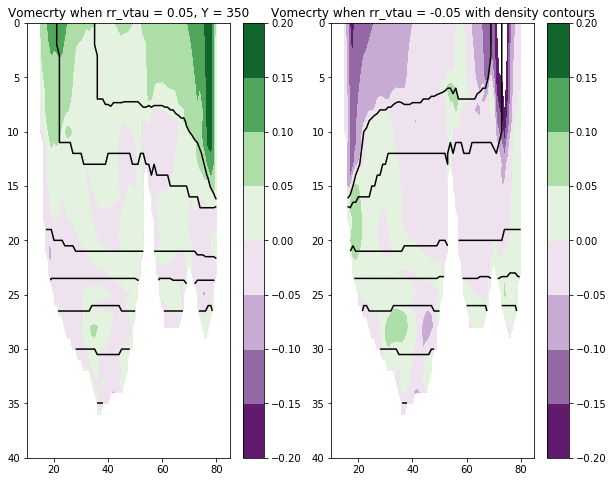

In [180]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN005V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.05, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(WS005V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.05 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

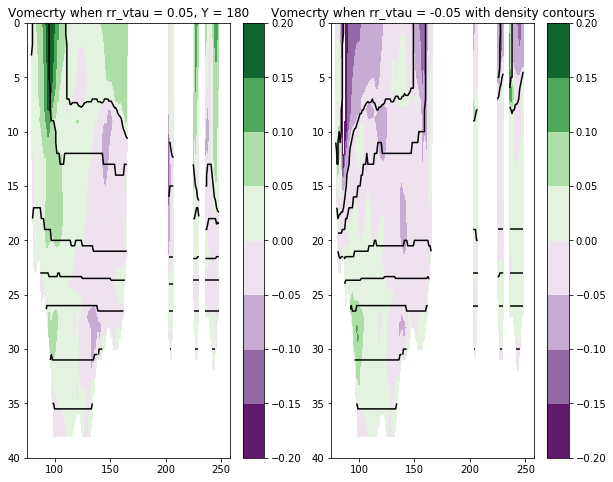

In [182]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN005V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.05, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(WS005V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.05 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# June with rr_vtau = 0.05, -0.05

In [64]:
SN005T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.05/SalishSea_1h_20160601_20160602_grid_T.nc')
SN005V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.05/SalishSea_1h_20160601_20160602_grid_V.nc')
SS005T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.05/SalishSea_1h_20160601_20160602_grid_T.nc')
SS005V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.05/SalishSea_1h_20160601_20160602_grid_V.nc')

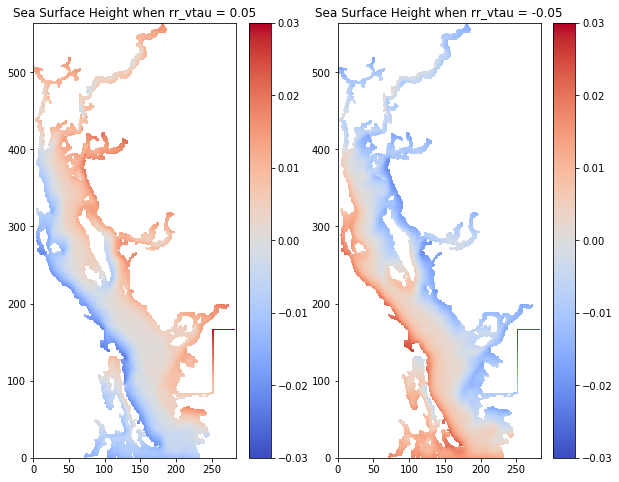

In [100]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN005T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.03, vmax = 0.03, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.05')

ssh2 = ma.masked_array(SS005T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.03, vmax = 0.03, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.05')

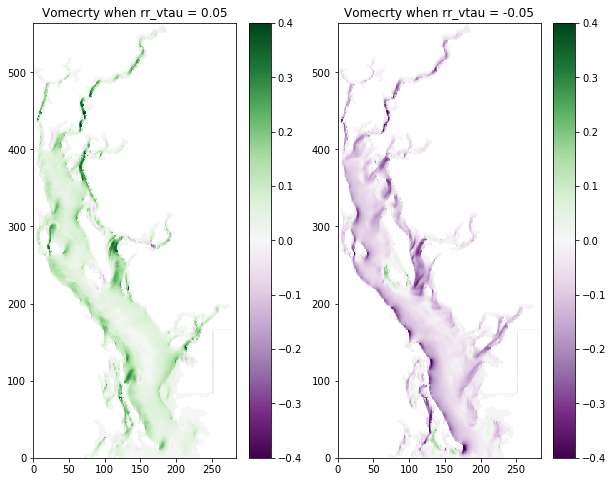

In [69]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN005V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.4, vmax = 0.4, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.05')

ssh2 = ma.masked_array(SS005V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.4, vmax = 0.4, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.05')

In [183]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN005T.variables['deptht'][:], 1) * ones,
                                        ones * SN005T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN005T.variables['deptht'][:], 1) * ones,
                                        ones * SN005T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN005T.variables['vosaline'][47,:,350,:],
                                        SN005T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS005T.variables['vosaline'][47,:,350,:],
                                        SS005T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN005T.variables['vosaline'][47,:,180,:],
                                        SN005T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS005T.variables['vosaline'][47,:,180,:],
                                        SS005T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

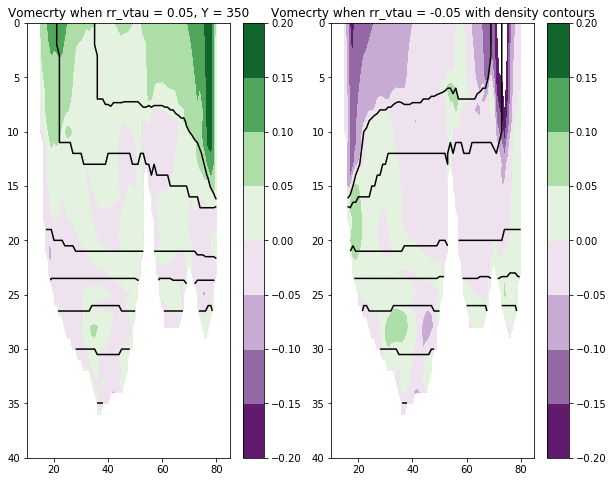

In [185]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN005V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.05, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(SS005V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2,levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.05 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

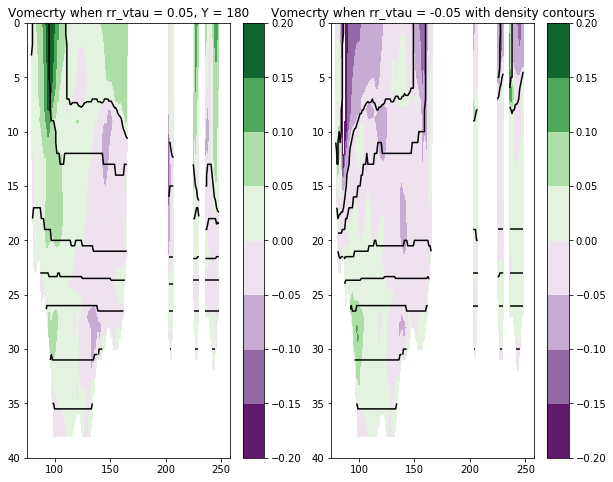

In [187]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN005V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.05, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(SS005V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.2,0.25,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.05 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# January with rr_vtau = 0.02, -0.02

In [74]:
WN002T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_T.nc')
WN002V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_V.nc')
WS002T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_T.nc')
WS002V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_V.nc')

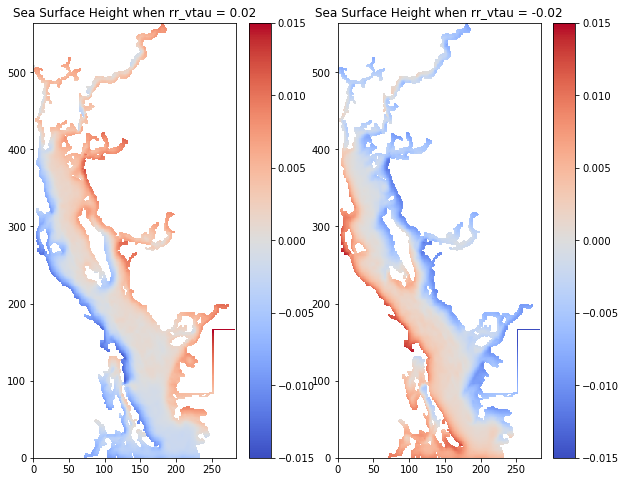

In [101]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN002T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.015, vmax = 0.015, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.02')

ssh2 = ma.masked_array(WS002T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.015, vmax = 0.015, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.02')

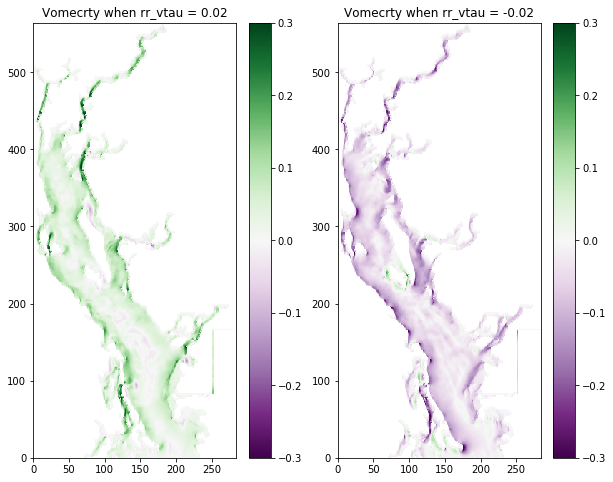

In [80]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN002V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.3, vmax = 0.3, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.02')

ssh2 = ma.masked_array(WS002V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.3, vmax = 0.3, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.02')

In [188]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN002T.variables['deptht'][:], 1) * ones,
                                        ones * WN002T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN002T.variables['deptht'][:], 1) * ones,
                                        ones * WN002T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN002T.variables['vosaline'][47,:,350,:],
                                        WN002T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS002T.variables['vosaline'][47,:,350,:],
                                        WS002T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN002T.variables['vosaline'][47,:,180,:],
                                        WN002T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS002T.variables['vosaline'][47,:,180,:],
                                        WS002T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

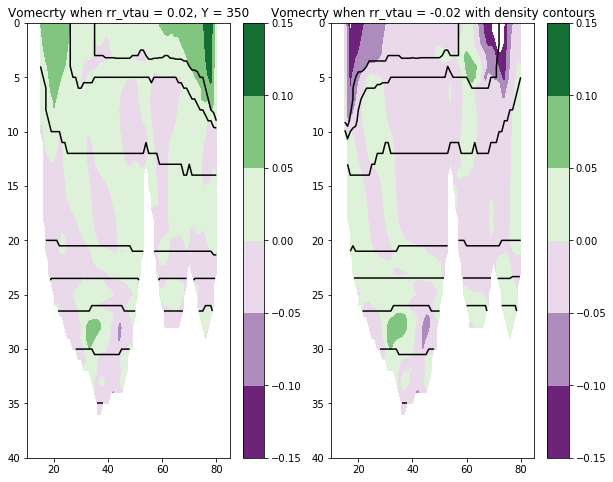

In [191]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN002V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.02, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(WS002V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2,levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.02 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

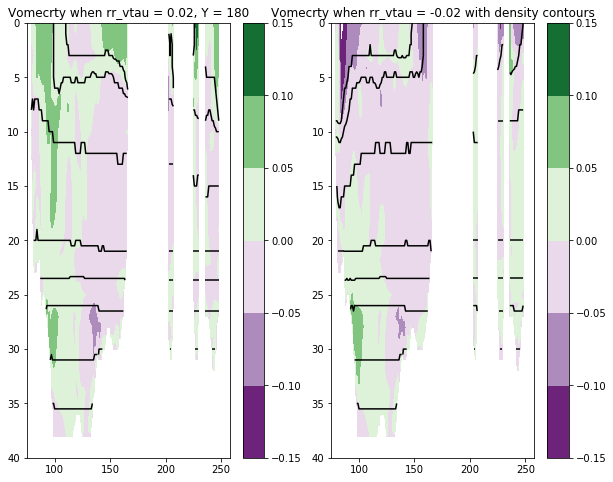

In [193]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN002V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.02, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(WS002V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.02 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# June with rr_vtau = 0.02, -0.02

In [81]:
SN002T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.02/SalishSea_1h_20160601_20160602_grid_T.nc')
SN002V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.02/SalishSea_1h_20160601_20160602_grid_V.nc')
SS002T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.02/SalishSea_1h_20160601_20160602_grid_T.nc')
SS002V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.02/SalishSea_1h_20160601_20160602_grid_V.nc')

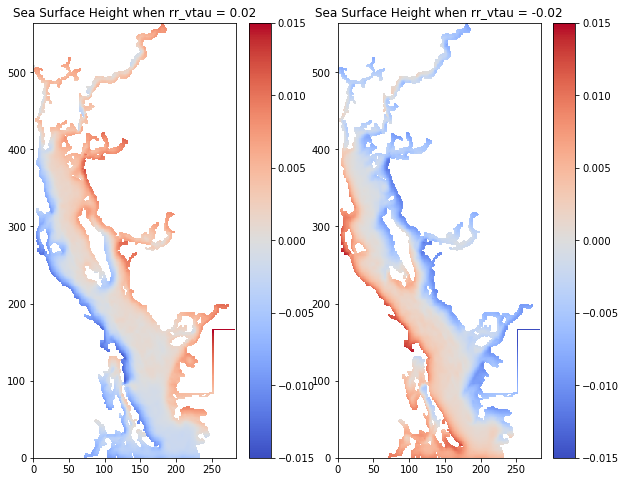

In [102]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN002T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.015, vmax = 0.015, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.02')

ssh2 = ma.masked_array(SS002T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.015, vmax = 0.015, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.02')

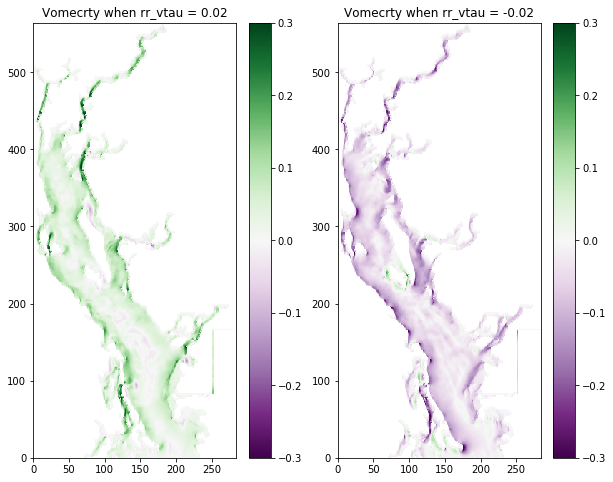

In [85]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN002V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.3, vmax = 0.3, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.02')

ssh2 = ma.masked_array(SS002V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.3, vmax = 0.3, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.02')

In [194]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN002T.variables['deptht'][:], 1) * ones,
                                        ones * SN002T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN002T.variables['deptht'][:], 1) * ones,
                                        ones * SN002T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN002T.variables['vosaline'][47,:,350,:],
                                        SN002T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS002T.variables['vosaline'][47,:,350,:],
                                        SS002T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN002T.variables['vosaline'][47,:,180,:],
                                        SN002T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS002T.variables['vosaline'][47,:,180,:],
                                        SS002T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

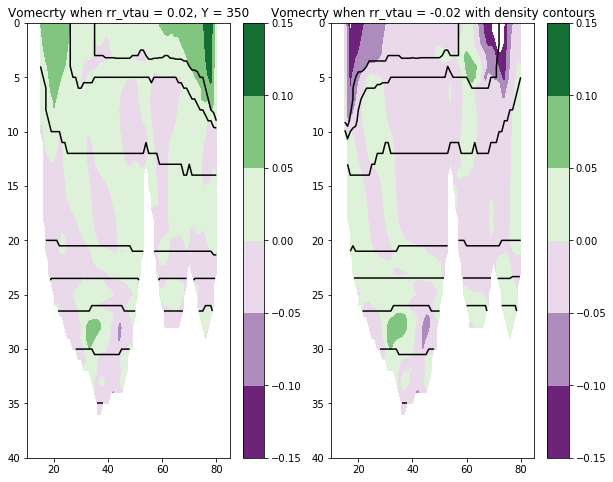

In [196]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN002V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.02, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(SS002V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2,levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.02 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

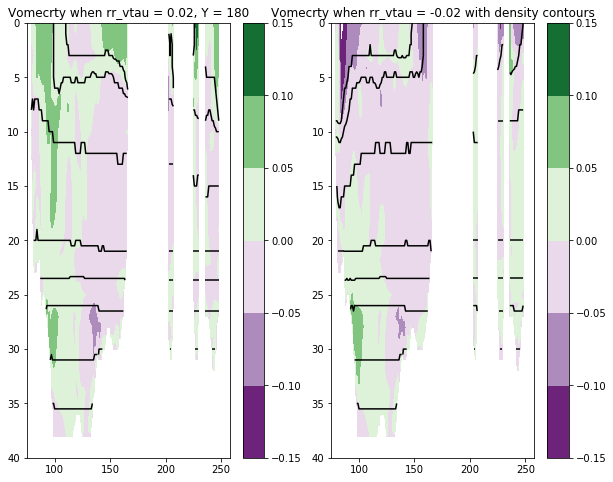

In [198]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN002V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.02, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(SS002V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.15,0.2,0.05), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.02 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# January with rr_vtau = 0.4, -0.4

In [86]:
WN04T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.4/SalishSea_1h_20170101_20170102_grid_T.nc')
WN04V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.4/SalishSea_1h_20170101_20170102_grid_V.nc')
WS04T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.4/SalishSea_1h_20170101_20170102_grid_T.nc')
WS04V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.4/SalishSea_1h_20170101_20170102_grid_V.nc')

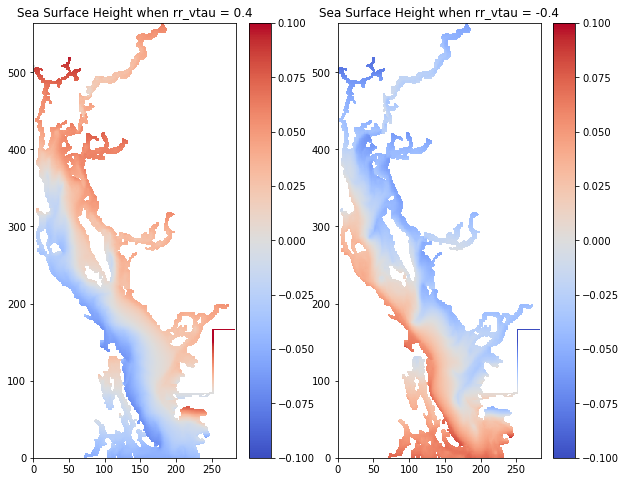

In [103]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN04T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.1, vmax = 0.1, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.4')

ssh2 = ma.masked_array(WS04T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.1, vmax = 0.1, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.4')

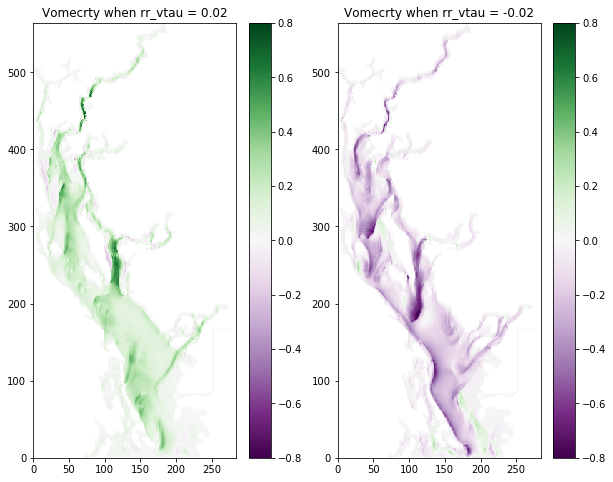

In [90]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN04V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.8, vmax = 0.8, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.02')

ssh2 = ma.masked_array(WS04V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.8, vmax = 0.8, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.02')

In [199]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN04T.variables['deptht'][:], 1) * ones,
                                        ones * WN04T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(WN04T.variables['deptht'][:], 1) * ones,
                                        ones * WN04T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN04T.variables['vosaline'][47,:,350,:],
                                        WN04T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS04T.variables['vosaline'][47,:,350,:],
                                        WS04T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN04T.variables['vosaline'][47,:,180,:],
                                        WN04T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS04T.variables['vosaline'][47,:,180,:],
                                        WS04T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

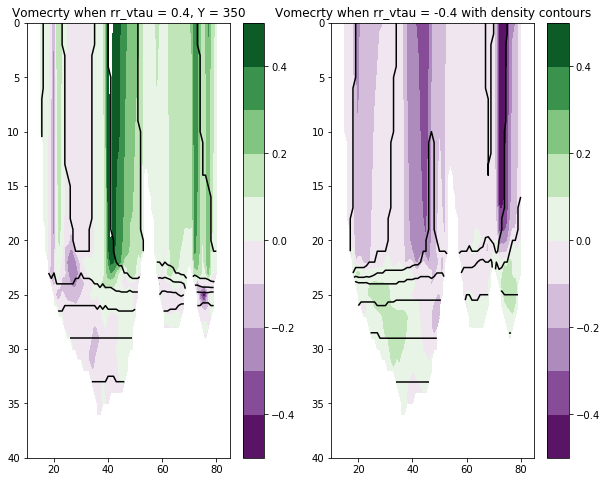

In [202]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN04V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1,levels = np.arange(-0.5,0.6,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.4, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(WS04V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2,levels = np.arange(-0.5,0.6,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.4 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

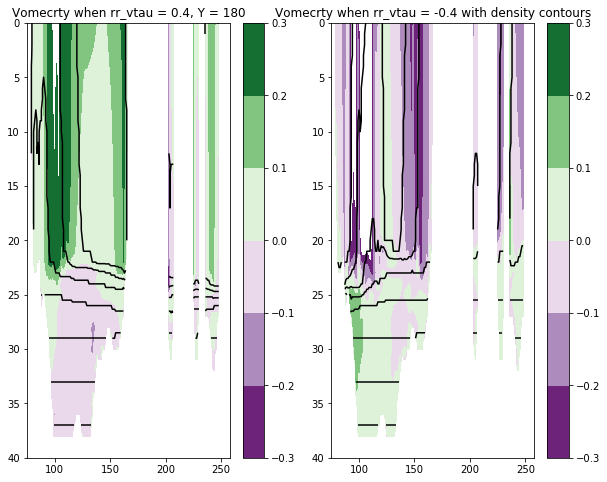

In [204]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(WN04V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.3,0.4,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.4, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(WS04V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.3,0.4,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.4 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))

# June with rr_vtau = 0.4, -0.4

In [91]:
SN04T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.4/SalishSea_1h_20160601_20160602_grid_T.nc')
SN04V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.4/SalishSea_1h_20160601_20160602_grid_V.nc')
SS04T = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.4/SalishSea_1h_20170101_20170102_grid_T.nc')
SS04V = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.4/SalishSea_1h_20160601_20160602_grid_V.nc')

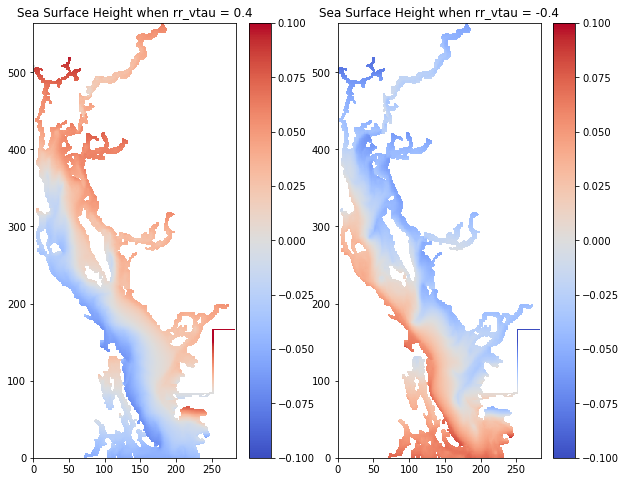

In [104]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN04T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.1, vmax = 0.1, 
                       cmap = 'coolwarm')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Sea Surface Height when rr_vtau = 0.4')

ssh2 = ma.masked_array(SS04T.variables['sossheig'][47,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.1, vmax = 0.1, 
                       cmap = 'coolwarm')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Sea Surface Height when rr_vtau = -0.4')

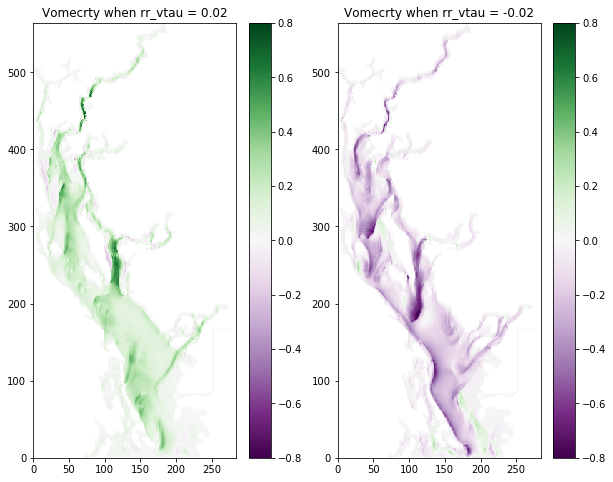

In [95]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN04V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh1 = ax1.pcolormesh(ssh1, vmin = -0.8, vmax = 0.8, 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.02')

ssh2 = ma.masked_array(SS04V.variables['vomecrty'][47,0,:,:], 
                       mask = 1-  new_domain[0,:,:])
mesh2 = ax2.pcolormesh(ssh2, vmin = -0.8, vmax = 0.8, 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.set_title('Vomecrty when rr_vtau = -0.02')

In [205]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN04T.variables['deptht'][:], 1) * ones,
                                        ones * SN04T.variables['nav_lat'][350,:][:]])
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(SN04T.variables['deptht'][:], 1) * ones,
                                        ones * SN04T.variables['nav_lat'][180,:][:]])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN04T.variables['vosaline'][47,:,350,:],
                                        SN04T.variables['votemper'][47,:,350,:],
                                        pressure1])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS04T.variables['vosaline'][47,:,350,:],
                                        SS04T.variables['votemper'][47,:,350,:],
                                        pressure1])
density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN04T.variables['vosaline'][47,:,180,:],
                                        SN04T.variables['votemper'][47,:,180,:],
                                        pressure2])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS04T.variables['vosaline'][47,:,180,:],
                                        SS04T.variables['votemper'][47,:,180,:],
                                        pressure2])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])
masked_density2 = ma.masked_array(density2, mask = 1 - new_domain[:,350,:])
masked_density3 = ma.masked_array(density3, mask = 1 - new_domain[:,180,:])
masked_density4 = ma.masked_array(density4, mask = 1 - new_domain[:,180,:])

(10, 85)

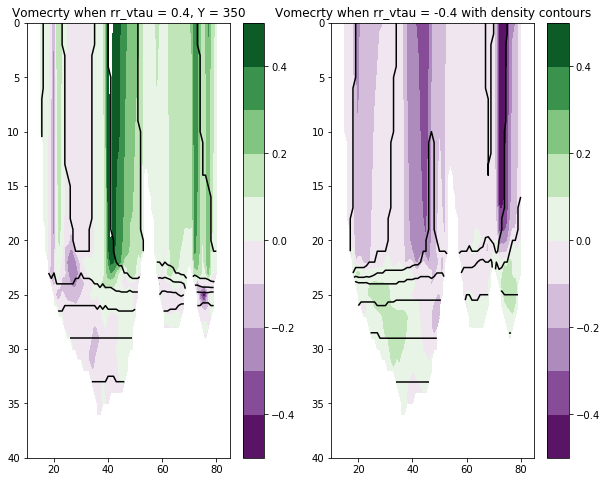

In [207]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN04V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.5,0.6,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density1, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.4, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

ssh2 = ma.masked_array(SS04V.variables['vomecrty'][47,:,350,:], 
                       mask = 1-  new_domain[:,350,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.5,0.6,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.4 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((10,85))

(75, 258)

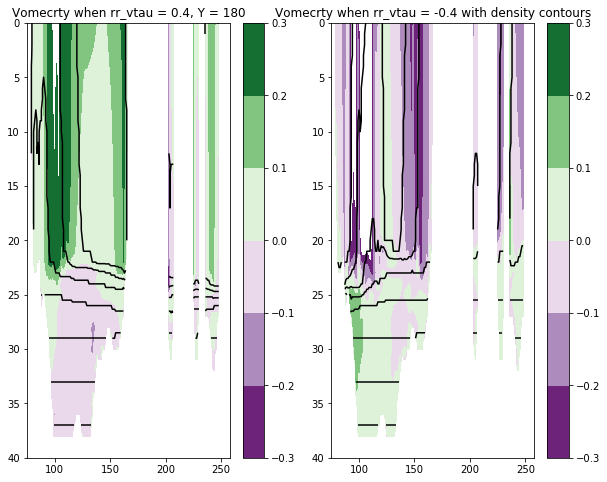

In [209]:
figs, (ax1,ax2) = plt.subplots(1,2,figsize=((10,8)))

ssh1 = ma.masked_array(SN04V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh1 = ax1.contourf(ssh1, levels = np.arange(-0.3,0.4,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh1, ax=ax1)
ax1.contour(masked_density3, colors='black')
ax1.set_title('Vomecrty when rr_vtau = 0.4, Y = 180')
ax1.set_ylim((40,0))
ax1.set_xlim((75,258))

ssh2 = ma.masked_array(SS04V.variables['vomecrty'][47,:,180,:], 
                       mask = 1-  new_domain[:,180,:])
mesh2 = ax2.contourf(ssh2, levels = np.arange(-0.3,0.4,0.1), 
                       cmap = 'PRGn')
figs.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density4, colors='black')
ax2.set_title('Vomecrty when rr_vtau = -0.4 with density contours')
ax2.set_ylim((40,0))
ax2.set_xlim((75,258))